# **Xception**
Original paper: [Xception: Deep Learning with Depthwise Separable Convolutions](https://arxiv.org/abs/1610.02357)

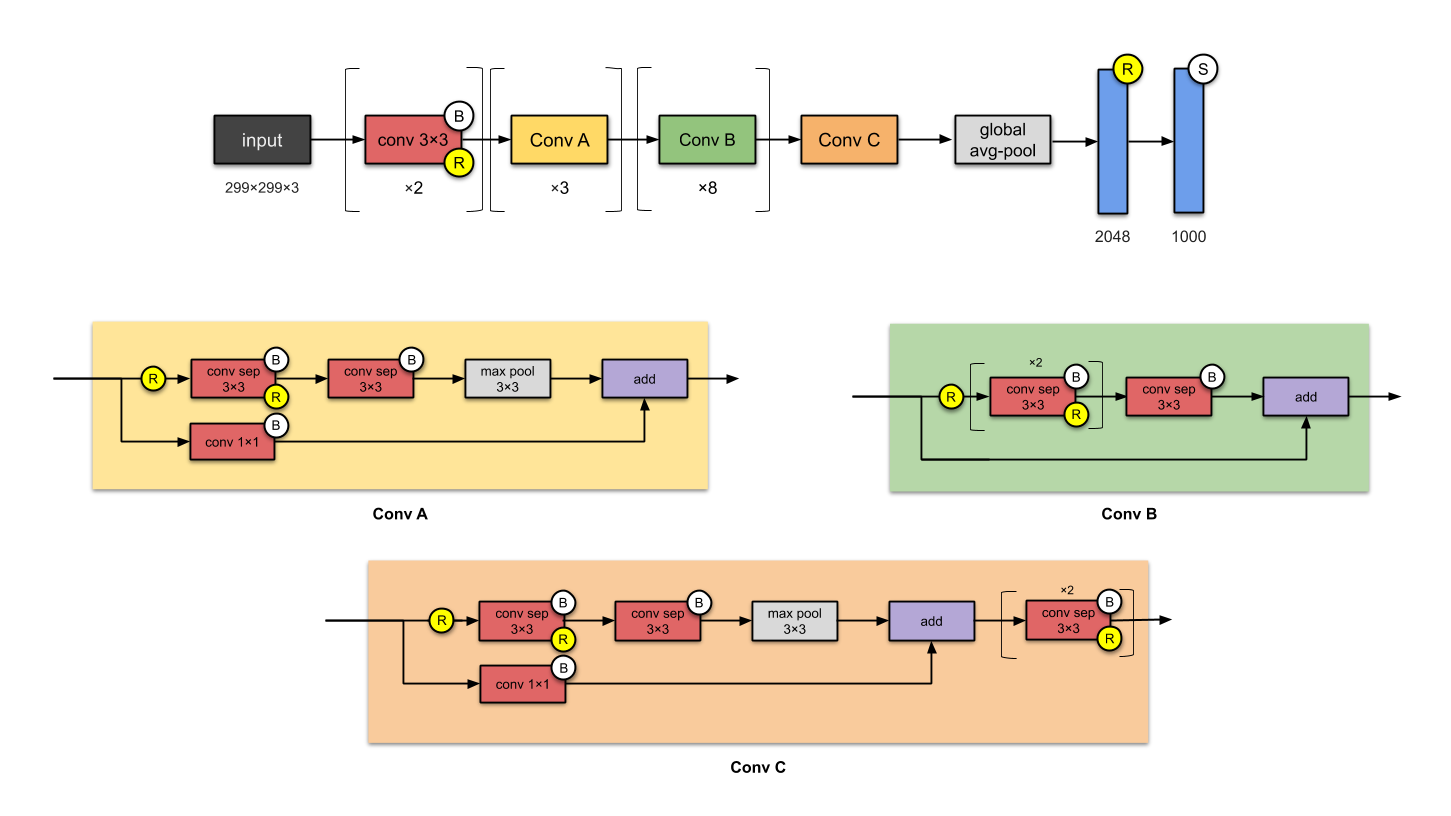

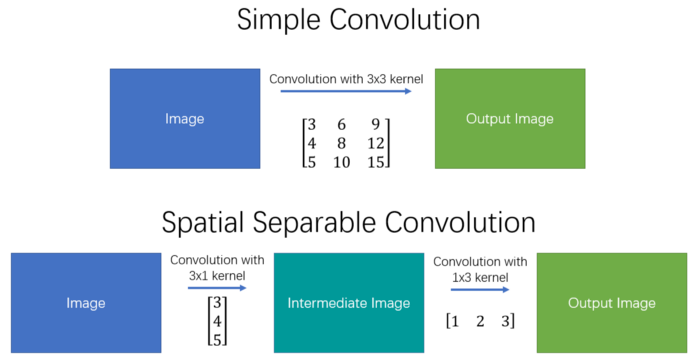

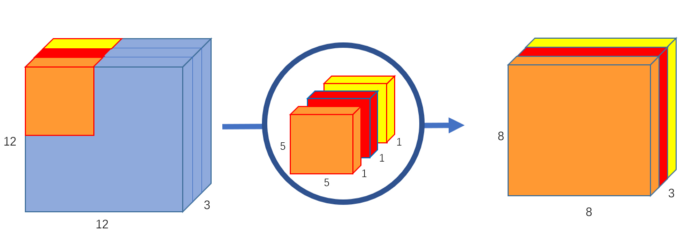

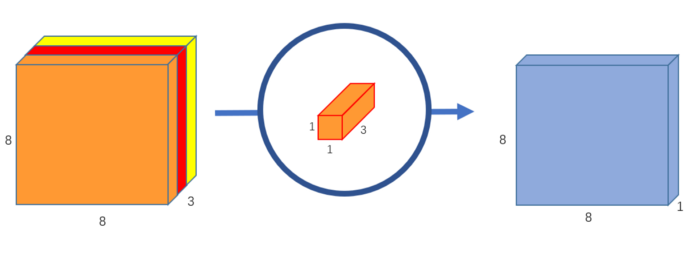

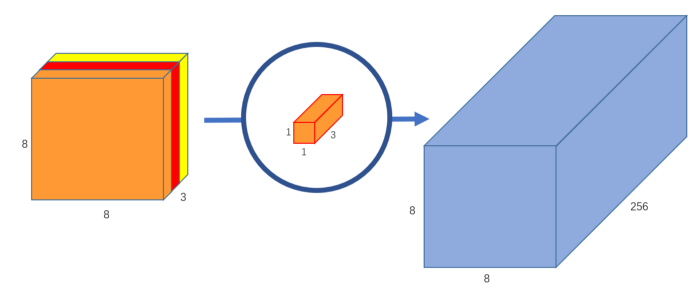

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 16)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 32)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 8)            136         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 8)            264         input_2[0][0]                    
______________________________________________________________________________________________

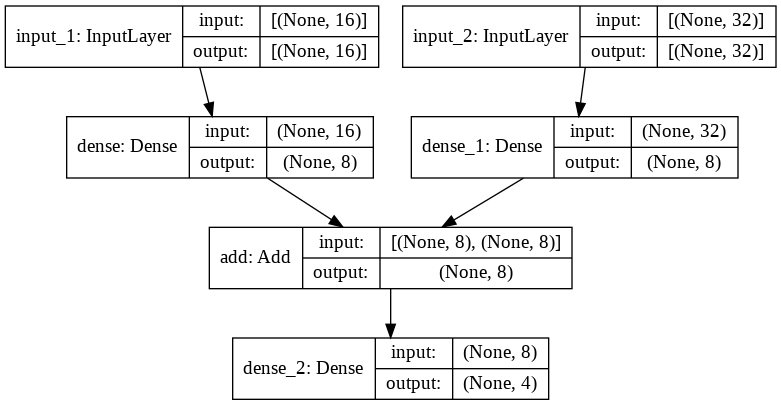

In [1]:
import keras

input1 = keras.layers.Input(shape=(16,))
x1 = keras.layers.Dense(8, activation='relu')(input1)

input2 = keras.layers.Input(shape=(32,))
x2 = keras.layers.Dense(8, activation='relu')(input2)
"""
It takes as input a list of tensors, all of the same shape, 
and returns a single tensor (also of the same shape).
"""
added = keras.layers.Add()([x1, x2]) 

out = keras.layers.Dense(4)(added)
model = keras.models.Model(inputs=[input1, input2], outputs=out)

print(model.summary())

from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)
